In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [15, 10]

matplotlib.rcParams.update({'font.size': 22})

matplotlib.rcParams.update({"axes.facecolor" : "white",
                     "axes.edgecolor":  "grey",'axes.edgecolor':'grey', 'axes.labelcolor':'grey',
                            'xtick.color':'grey', 'ytick.color':'grey','text.color':'grey'})

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

Let us define the three function reducing to $1$ in EdS:

$v = -\frac{ 7E}{3 D^2 } \,, \qquad w^{3a} = -\frac{ 3 F^{(3a)}}{D^3 }\,, \qquad w^{3b} = \frac{ 21 F^{(3b)}}{10 D^3 }$

as well as there derivatives:

$f = \frac{\dot D}{D\mathcal H}\,, \qquad g = -\frac{7\dot E}{6 \mathcal H D^2} \,, \qquad h^{(3a)} = -\frac{\dot F^{(3a)}}{\mathcal H D^2} \,, \qquad h^{(3b)} = \frac{7\dot F^{(3b)}}{10 \mathcal H D^2}$




In [84]:
G = 0.6901/0.3099

def E_SRH(DoD0,D0=1.0):
    return -3./7.*DoD0**2 - 3.*G/1001.*D0**3*DoD0**5 - 960.*G**2/3556553.*D0**6*DoD0**8 - 2040.*G**3/52929877.*D0**9*DoD0**11 - 1038060000./151269407005717. *G**4 *D0**12*DoD0**14- 85671376080./61566648651326819. *G**5 *D0**15*DoD0**17 - \
            1864100579256192./6062846087823581445961.*G**6*D0**18*DoD0**20

def Fa_SRH(DoD0,D0=1.0):
    return -DoD0**3/3. - 4./825.*G*D0**3*DoD0**6 - 109./215985.*G**2*D0**6*DoD0**9 - 15408./200362085.*G**3*D0**9*DoD0**12 - 46316624./3259690760865.*G**4*D0**12*DoD0**15 - 4677016576./1584861647932563.*G**5*D0**15*DoD0**18 - \
            330321967776./498174844666802303.*G**6*D0**18*DoD0**21

def Fb_SRH(DoD0,D0=1.0):
    return 10*DoD0**3/21. + 538./75075.*G*D0**3*DoD0**6 - 3581./4849845.*G**2*D0**6*DoD0**9 - 16644976./148468304985.*G**3*D0**9*DoD0**12 - 24575717136./1188545340759205.*G**4*D0**12*DoD0**15 - 11397154716512./2656837684107257343.*G**5*D0**15*DoD0**18 - \
            1348899757328270624./1400517446287247314016991.*G**6*D0**18*DoD0**21


In [97]:
growth = np.loadtxt('/home/thomas/generic_cosmo/master/build/GrowthFactors.txt')

In [98]:
a = growth[:,0]

D = growth[:,1]
f = growth[:,2]

E = growth[:,3]
g = growth[:,4]

Fa = growth[:,5]
ha = growth[:,6]

Fb = growth[:,7]
hb = growth[:,8]

In [99]:
E_th = E_SRH(D/D0,D0)
Fa_th= Fa_SRH(D/D0,D0)
Fb_th= Fb_SRH(D/D0,D0)

Text(0.5, 0, '$a$')

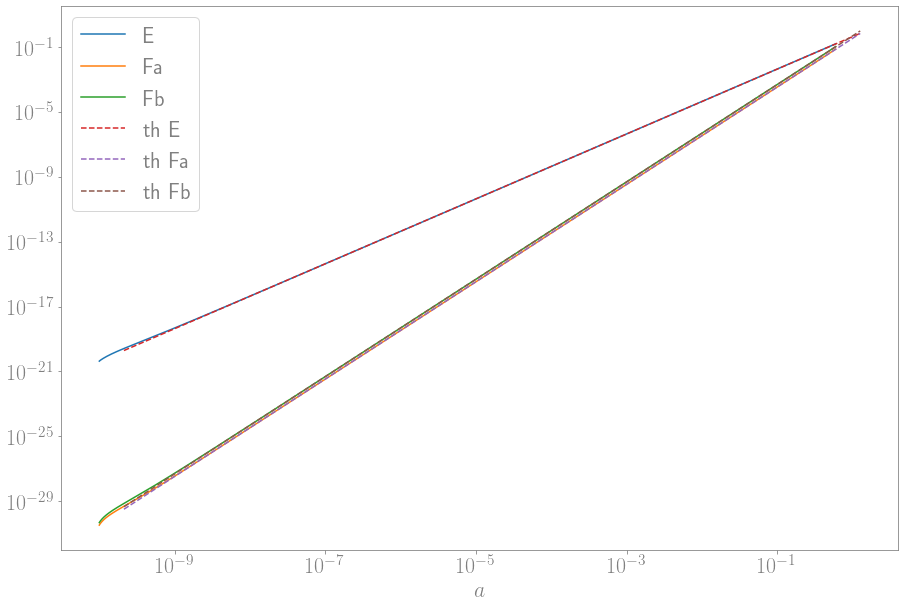

In [100]:
#plt.plot(a, D, label='D')
D0 = np.interp(1.0,a , D) 
DoD0 = D/D0

plt.plot(D, np.abs(E), label='E')
plt.plot(D, np.abs(Fa), label='Fa')
plt.plot(D, np.abs(Fb), label='Fb')




plt.plot(DoD0, np.abs(E_th), '--', label='th E')
plt.plot(DoD0, np.abs(Fa_th), '--',label='th Fa')
plt.plot(DoD0, np.abs(Fb_th), '--',label='th Fb')

plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$a$')

Text(0.5, 0, '$a$')

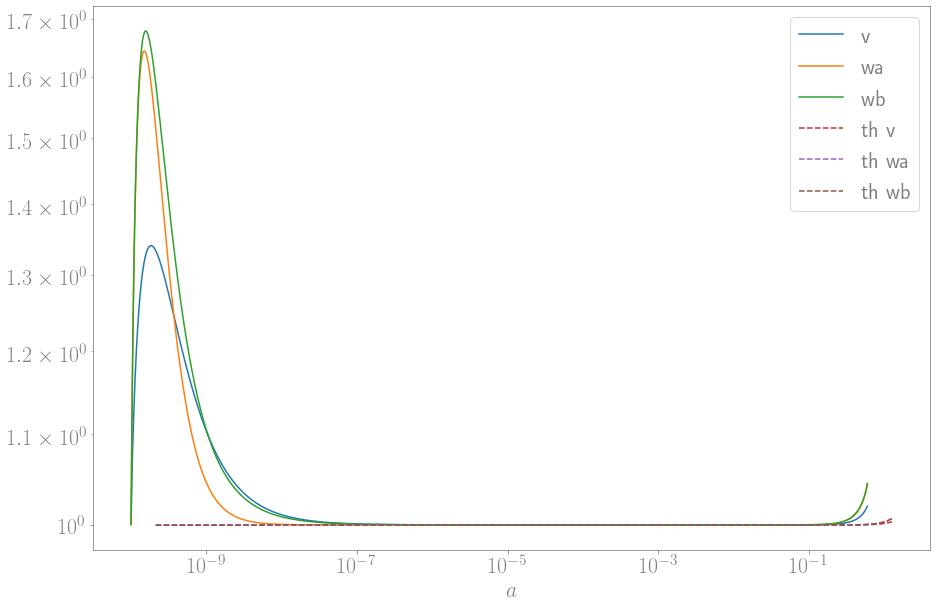

In [101]:

plt.plot(D, -7*E/3/D**2, label='v')
plt.plot(D, -3*Fa/D**3, label='wa')
plt.plot(D, 21*Fb/10/D**3, label='wb')

plt.plot(DoD0, -7*E_th/3/DoD0**2, '--' ,label='th v')
plt.plot(DoD0, -3*Fa_th/DoD0**3,'--' ,label='th wa')
plt.plot(DoD0, 21*Fb_th/10/DoD0**3,'--' ,label='th wb')


plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$a$')

Text(0.5, 0, '$a$')

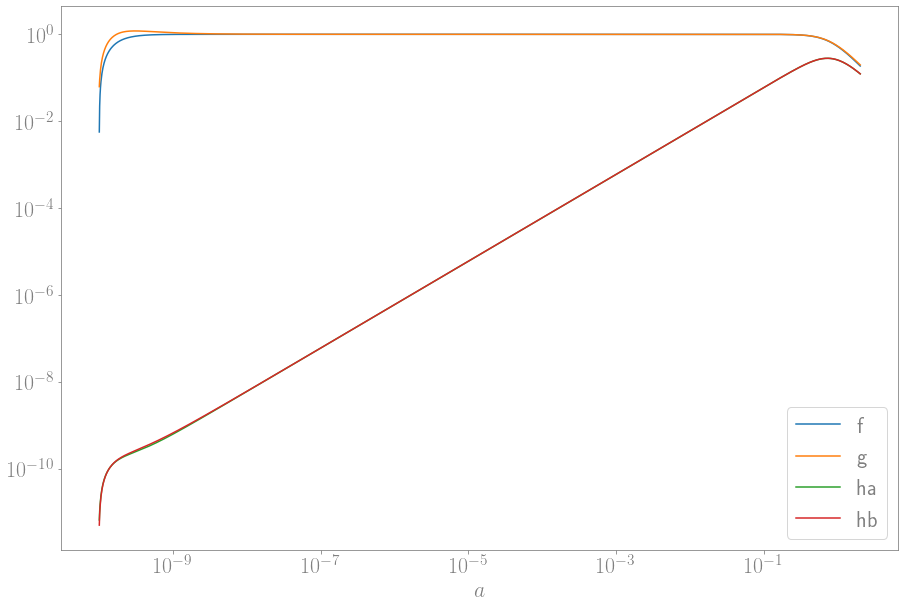

In [102]:
plt.plot(a, np.abs(f), label='f')
plt.plot(a, np.abs(g), label='g')
plt.plot(a, np.abs(ha), label='ha')
plt.plot(a, np.abs(hb), label='hb')

plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$a$')